In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

#### Import data set into dataframe

In [4]:
# Import S&P data set from the excel file
import zipfile
import pandas as pd

zip_path = r"C:\Users\georg\Downloads\SP500 options all series all expirations fromm 1996_csv.zip"
file_name = "ajjczlf8wdedmsa5.csv"

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

print(df.head())

    secid        date    symbol  symbol_flag      exdate   last_date cp_flag  \
0  108105  04/01/1996  098D6.C9            0  17/02/1996         NaN       C   
1  108105  04/01/1996  09C49.C1            0  16/03/1996         NaN       P   
2  108105  04/01/1996  09B4B.56            0  20/01/1996  04/01/1996       P   
3  108105  04/01/1996  098E1.23            0  22/06/1996         NaN       C   
4  108105  04/01/1996  09B4C.F9            0  16/03/1996  04/01/1996       C   

   strike_price  best_bid  best_offer  ...   sic  index_flag  exchange_d  \
0        570000   48.2500     49.2500  ...  9999           1       32768   
1        550000    1.1875      1.3125  ...  9999           1       32768   
2        525000    0.0000      0.1250  ...  9999           1       32768   
3        595000   38.5000     39.5000  ...  9999           1       32768   
4        625000    9.1250      9.8750  ...  9999           1       32768   

   class  issue_type  industry_group              issuer  div_

In [6]:
# Create sub data frame with only columns that interest us (we might add more in case it is needed)
import gc  
df_sub = df[["date", "exdate", "cp_flag", "strike_price", "best_bid", "best_offer", "impl_volatility", "delta", "gamma", "vega", "theta"]].copy()

# Delete df to free up memory  
del df  
# Run garbage collection  
gc.collect()

0

In [8]:
# Print header of the sub data frame
df_sub.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta
0,04/01/1996,17/02/1996,C,570000,48.2500,49.2500,NaN,NaN,NaN,NaN,NaN
1,04/01/1996,16/03/1996,P,550000,1.1875,1.3125,0.181884,-0.057566,0.002341,31.161770,-13.584810
2,04/01/1996,20/01/1996,P,525000,0.0000,0.1250,0.328031,-0.004897,0.000358,1.717098,-7.240195
3,04/01/1996,22/06/1996,C,595000,38.5000,39.5000,0.125173,0.732626,0.006102,134.141600,-29.716260
4,04/01/1996,16/03/1996,C,625000,9.1250,9.8750,0.103697,0.456910,0.014081,106.843300,-37.256020


In [10]:
# Divide strike price by 1000 
df_sub.strike_price = df_sub.strike_price/1000 

In [12]:
# Turn strike price to float
df_sub["strike_price"] = df_sub["strike_price"].astype(float)

### Import S&P spot data from 2015 till 2025

In [15]:
df_2 = pd.read_csv(r"C:\Users\georg\Downloads\S&P 500 Historical Data (3).csv")  
print(df_2.head())  

         Date     Price      Open      High       Low Vol. Change %
0  03/05/2025  5,846.24  5,780.20  5,860.33  5,742.34  NaN    1.18%
1  03/04/2025  5,778.15  5,811.98  5,865.08  5,732.59  NaN   -1.22%
2  03/03/2025  5,849.72  5,968.33  5,986.09  5,810.91  NaN   -1.76%
3  02/28/2025  5,954.50  5,856.74  5,959.40  5,837.66  NaN    1.59%
4  02/27/2025  5,861.57  5,981.88  5,993.69  5,858.78  NaN   -1.59%


In [17]:
# Change Date format
df_2["Date"] = pd.to_datetime(df_2["Date"]).dt.strftime("%d/%m/%Y")

In [19]:
# Print df_2 header
df_2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/03/2025,"5,846.24","5,780.20","5,860.33","5,742.34",NaN,1.18%
1,04/03/2025,"5,778.15","5,811.98","5,865.08","5,732.59",NaN,-1.22%
2,03/03/2025,"5,849.72","5,968.33","5,986.09","5,810.91",NaN,-1.76%
3,28/02/2025,"5,954.50","5,856.74","5,959.40","5,837.66",NaN,1.59%
4,27/02/2025,"5,861.57","5,981.88","5,993.69","5,858.78",NaN,-1.59%


In [21]:
# Rename Price column to spot
df_2 = df_2.rename(columns={"Price": "spot"})

In [25]:
# Turn spot price to float
df_2["spot"] = df_2["spot"].str.replace(",", "").astype(float)

#### Merge the original data set with S&P spot data

In [28]:
# Merge the sub data frame so that you have the S&P spot prices in it
df_1 = df_sub.merge(df_2[["Date", "spot"]], left_on="date", right_on="Date", how="left").drop(columns=["Date"])

In [30]:
# Delete df_sub to free up memory  
del df_sub 
# Run garbage collection  
gc.collect()

991

In [32]:
# Remove rows where spot is not available, (so before 2015 in our case)
df_1 = df_1.dropna(subset=["spot"])

In [34]:
# Remove where delta is not available, but keep when delta is not available because exdate is equal to date
df_1 = df_1[~df_1["delta"].isna() | (df_1["exdate"] == df_1["date"])]

In [36]:
# Print header of df_1
df_1.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot
7822636,12/11/2015,20/11/2015,C,1775.0,267.9,272.6,0.325560,0.998839,0.000029,0.752901,32.13737,2046.0
7822637,12/11/2015,20/11/2015,C,1780.0,262.9,267.6,0.319375,0.998831,0.000030,0.760462,32.18757,2046.0
7822638,12/11/2015,20/11/2015,C,1785.0,257.9,262.6,0.313205,0.998822,0.000031,0.768272,32.23787,2046.0
7822639,12/11/2015,20/11/2015,C,1790.0,252.7,257.8,0.307050,0.998813,0.000031,0.776346,32.28825,2046.0
7822640,12/11/2015,20/11/2015,C,1795.0,247.9,252.6,0.300910,0.998804,0.000032,0.784698,32.33873,2046.0


In [38]:
# Turn dates columns into dates
df_1["date"] = pd.to_datetime(df_1["date"], dayfirst=True)
df_1["exdate"] = pd.to_datetime(df_1["exdate"], dayfirst=True)

#### Create Sub Data frame for calls

In [41]:
# Create data frame for just calls
df_call = df_1[df_1.cp_flag == "C"]

In [43]:
# Delete df_1 to free up memory  
del df_1 
# Run garbage collection  
gc.collect()

0

In [45]:
# Print header of the call data frame
df_call.head(5)

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot
7822636,2015-11-12,2015-11-20,C,1775.0,267.9,272.6,0.325560,0.998839,0.000029,0.752901,32.13737,2046.0
7822637,2015-11-12,2015-11-20,C,1780.0,262.9,267.6,0.319375,0.998831,0.000030,0.760462,32.18757,2046.0
7822638,2015-11-12,2015-11-20,C,1785.0,257.9,262.6,0.313205,0.998822,0.000031,0.768272,32.23787,2046.0
7822639,2015-11-12,2015-11-20,C,1790.0,252.7,257.8,0.307050,0.998813,0.000031,0.776346,32.28825,2046.0
7822640,2015-11-12,2015-11-20,C,1795.0,247.9,252.6,0.300910,0.998804,0.000032,0.784698,32.33873,2046.0


In [47]:
# Zoom in on a particular security (same expiration and strike price), to see what data set looks like
df_call[(df_call["strike_price"] == 1670 ) & (df_call["exdate"] == "30/11/2015")]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot
7826293,2015-11-12,2015-11-30,C,1670.0,366.9,382.8,0.409833,0.987305,0.000164,13.878670,-19.740010,2046.0
7834587,2015-11-13,2015-11-30,C,1670.0,343.8,359.2,0.346069,0.994313,0.000091,6.024141,15.437990,2023.0
7850433,2015-11-17,2015-11-30,C,1670.0,370.9,387.5,0.398380,0.996378,0.000058,3.434648,19.341100,2050.4
7858353,2015-11-18,2015-11-30,C,1670.0,404.9,421.1,0.533957,0.989379,0.000132,10.034100,-42.883660,2083.6
7866409,2015-11-19,2015-11-30,C,1670.0,402.5,420.4,0.609736,0.982724,0.000188,14.985090,-113.838700,2081.2
7889195,2015-11-24,2015-11-30,C,1670.0,410.9,426.3,0.610013,0.997803,0.000037,1.601093,8.588126,2089.1
7896796,2015-11-25,2015-11-30,C,1670.0,416.2,422.5,0.875850,0.986940,0.000154,8.075024,-221.619000,2088.9
7904749,2015-11-27,2015-11-30,C,1670.0,413.6,429.8,1.248416,0.979076,0.000211,9.474211,-684.417300,2090.1
7912333,2015-11-30,2015-11-30,C,1670.0,402.0,425.6,NaN,NaN,NaN,NaN,NaN,2080.4


In [49]:
# Create id column so that each security with the same strike and expiration date has the same id
df_call["id"] = df_call.groupby(["strike_price", "exdate"]).ngroup()

In [51]:
# Remove securities that only have deltas of NAs
df_call = df_call.groupby("id").filter(lambda x: x["delta"].notna().any())

In [53]:
# Check if id works fine, by taking a call with same strike and expiration date, and seeing if it has the same id
df_call[(df_call["strike_price"] == 1670 ) & (df_call["exdate"] == "30/11/2015")]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7826293,2015-11-12,2015-11-30,C,1670.0,366.9,382.8,0.409833,0.987305,0.000164,13.878670,-19.740010,2046.0,11838
7834587,2015-11-13,2015-11-30,C,1670.0,343.8,359.2,0.346069,0.994313,0.000091,6.024141,15.437990,2023.0,11838
7850433,2015-11-17,2015-11-30,C,1670.0,370.9,387.5,0.398380,0.996378,0.000058,3.434648,19.341100,2050.4,11838
7858353,2015-11-18,2015-11-30,C,1670.0,404.9,421.1,0.533957,0.989379,0.000132,10.034100,-42.883660,2083.6,11838
7866409,2015-11-19,2015-11-30,C,1670.0,402.5,420.4,0.609736,0.982724,0.000188,14.985090,-113.838700,2081.2,11838
7889195,2015-11-24,2015-11-30,C,1670.0,410.9,426.3,0.610013,0.997803,0.000037,1.601093,8.588126,2089.1,11838
7896796,2015-11-25,2015-11-30,C,1670.0,416.2,422.5,0.875850,0.986940,0.000154,8.075024,-221.619000,2088.9,11838
7904749,2015-11-27,2015-11-30,C,1670.0,413.6,429.8,1.248416,0.979076,0.000211,9.474211,-684.417300,2090.1,11838
7912333,2015-11-30,2015-11-30,C,1670.0,402.0,425.6,NaN,NaN,NaN,NaN,NaN,2080.4,11838


In [55]:
# Check if id works fine, by taking a call with the same id, and seeing if it has the same strike and expiration
df_call[df_call.id == 3]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
9356814,2016-09-12,2018-01-19,C,100.0,1998.0,2005.8,1.183777,0.970064,0.000002,14.103020,37.22855,2159.0,3
9364460,2016-09-13,2018-01-19,C,100.0,1963.1,1974.9,0.987379,0.971224,0.000001,5.246478,40.89951,2127.0,3
9379772,2016-09-15,2018-01-19,C,100.0,1984.6,1996.1,1.161305,0.970368,0.000002,12.801030,37.73040,2147.3,3
9386814,2016-09-16,2018-01-19,C,100.0,1975.8,1986.3,0.982484,0.971435,0.000001,4.908238,41.31979,2139.2,3
9394155,2016-09-19,2018-01-19,C,100.0,1978.2,1987.5,1.162841,0.970571,0.000002,12.629120,37.61853,2139.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11906695,2017-10-30,2018-01-19,C,100.0,2461.3,2467.3,2.385315,0.996199,0.000000,1.178551,33.62462,2572.8,3
11998333,2017-11-09,2018-01-19,C,100.0,2472.4,2481.5,2.376167,0.996736,0.000000,0.631071,36.15548,2584.6,3
12053885,2017-11-16,2018-01-19,C,100.0,2474.5,2483.6,2.817151,0.996772,0.000000,1.592040,27.32767,2585.6,3
12074957,2017-11-20,2018-01-19,C,100.0,2471.1,2480.2,2.533397,0.997240,0.000000,0.480005,36.32410,2582.1,3


#### Only take securities that are reasonable ie that have delta's between 0.3 and 0.7 at inception

In [58]:
# Only take securities that are reasonable ie that have delta's between 0.3 and 0.7 at inception

# Step 1: Identify columns to drop (for efficiency during filtering)
columns_to_drop = ['date', 'cp_flag', 'best_bid', 'best_offer', 'impl_volatility', 'gamma', 'vega', 'theta', 'spot']

# Step 2: Drop unnecessary columns temporarily
df_call_dropped = df_call.drop(columns=columns_to_drop, errors='ignore')

# Step 3: Check if delta is within the specified range
df_call_dropped["meets_condition"] = (df_call_dropped["delta"] >= 0.3) & (df_call_dropped["delta"] <= 0.7)

# Step 4: Flag if the first occurrence of each 'id' meets the condition
df_call_dropped["first_meets_condition"] = df_call_dropped.groupby("id")["meets_condition"].transform("first")

# Step 5: Keep only rows where the first occurrence meets the condition
df_call_dropped = df_call_dropped[df_call_dropped["first_meets_condition"]]

# Step 6: Readd the columns that you dropped
df_call = df_call.loc[df_call_dropped.index]

In [60]:
# Display header of new data set
df_call.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7822685,2015-11-12,2015-11-20,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.8744,2046.0,27454
7822686,2015-11-12,2015-11-20,C,2025.0,30.2,34.2,0.182448,0.657458,0.007103,104.04210,-469.7659,2046.0,27739
7822687,2015-11-12,2015-11-20,C,2030.0,26.8,30.4,0.178269,0.623482,0.007512,107.51250,-475.8609,2046.0,28158
7822688,2015-11-12,2015-11-20,C,2035.0,23.6,26.8,0.174420,0.586778,0.007877,110.29300,-479.1226,2046.0,28450
7822689,2015-11-12,2015-11-20,C,2040.0,21.2,23.7,0.174757,0.546783,0.007998,112.20600,-490.3365,2046.0,28638


In [68]:
# Check the data set for a particular ID number
df_call[df_call.id == 27454]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7822685,2015-11-12,2015-11-20,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.8744,2046.0,27454
7830976,2015-11-13,2015-11-20,C,2020.0,19.3,22.1,0.188305,0.524402,0.008150,103.24620,-571.5076,2023.0,27454
7839270,2015-11-16,2015-11-20,C,2020.0,34.3,39.4,0.204061,0.810930,0.007118,50.32934,-593.4573,2053.2,27454
7847194,2015-11-17,2015-11-20,C,2020.0,32.2,35.8,0.232706,0.808023,0.007729,41.43382,-848.8328,2050.4,27454
7855116,2015-11-18,2015-11-20,C,2020.0,62.4,67.8,0.419924,0.921944,0.003185,15.90542,-1183.2970,2083.6,27454


#### Black Scholes Delta Hedging

In [71]:
# Function to perform BS delta hedge calculations for each security id
def delta_hedge(group):
    # Initialize the balance for the first row
    group['balance'] = group['best_bid'].iloc[0] - group['delta'].iloc[0] * group['spot'].iloc[0]

    # Loop through the subsequent rows and update the balance
    for i in range(1, len(group) - 1):  # Exclude the last row
        group['balance'].iloc[i] = group['balance'].iloc[i - 1] - (group['delta'].iloc[i] - group['delta'].iloc[i - 1]) * group['spot'].iloc[i]
    
    # Final row adjustment based on the condition
    last_idx = len(group) - 1
    if group['spot'].iloc[last_idx] > group['strike_price'].iloc[last_idx]:
        group['balance'].iloc[last_idx] = group['balance'].iloc[last_idx - 1] - (1 - group['delta'].iloc[last_idx - 1]) * group['spot'].iloc[last_idx] + group['strike_price'].iloc[last_idx]
    else:
        group['balance'].iloc[last_idx] = group['balance'].iloc[last_idx - 1] + group['delta'].iloc[last_idx - 1] * group['spot'].iloc[last_idx]
    
    return group


In [73]:
# Apply BS delta hedging and see results

# Step 1: Group by 'id' and apply the delta hedge calculation
df_call_delta_hedge_bs = df_call.groupby('id', group_keys=False).apply(delta_hedge)

# Extract only the final balance for each id (last row for each id)
final_balance_per_id = df_call_delta_hedge_bs.groupby('id').last()[['balance']]

# Check the result
print(final_balance_per_id.head())

         balance
id              
13339   5.405698
13395   4.365649
13396   5.936051
13497   6.143961
13624 -30.141520


In [75]:
# Check header of df_call_delta_hedge_bs
df_call_delta_hedge_bs.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id,balance
7822685,2015-11-12,2015-11-20,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.8744,2046.0,27454,-1376.373018
7822686,2015-11-12,2015-11-20,C,2025.0,30.2,34.2,0.182448,0.657458,0.007103,104.04210,-469.7659,2046.0,27739,-1314.959068
7822687,2015-11-12,2015-11-20,C,2030.0,26.8,30.4,0.178269,0.623482,0.007512,107.51250,-475.8609,2046.0,28158,-1248.844172
7822688,2015-11-12,2015-11-20,C,2035.0,23.6,26.8,0.174420,0.586778,0.007877,110.29300,-479.1226,2046.0,28450,-1176.947788
7822689,2015-11-12,2015-11-20,C,2040.0,21.2,23.7,0.174757,0.546783,0.007998,112.20600,-490.3365,2046.0,28638,-1097.518018


#### Show results of BS Delta Hedging

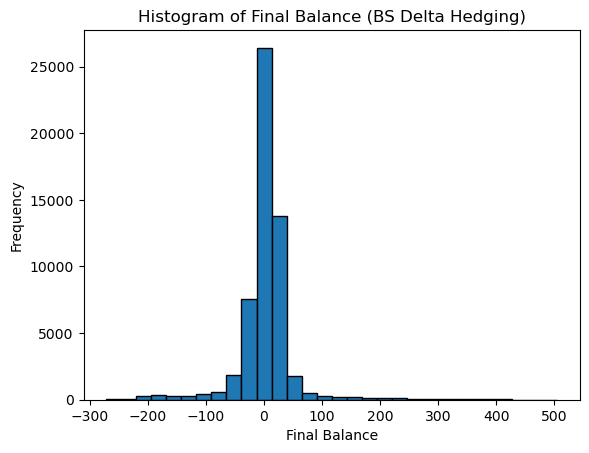

In [78]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(final_balance_per_id, bins=30, edgecolor='black') 

# Adding labels and title
plt.xlabel('Final Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Final Balance (BS Delta Hedging)')

# Show the plot
plt.show()

In [80]:
from tabulate import tabulate  

stats = final_balance_per_id["balance"].agg(["mean", "std"]).to_frame().T  
quantiles = final_balance_per_id["balance"].quantile([0.25, 0.5, 0.75]).to_frame().T  

quantiles.columns = ["25th Quantile", "50th Quantile", "75th Quantile"]  
stats.columns = ["Mean", "Std"]  

final_stats = pd.concat([stats, quantiles], axis=1)  

print(tabulate(final_stats, headers="keys", tablefmt="grid"))


+---------+---------+---------+-----------------+-----------------+-----------------+
|         |    Mean |     Std |   25th Quantile |   50th Quantile |   75th Quantile |
+=========+=========+=========+=================+=================+=================+
| balance | 2.73319 | 49.0882 |        -8.64091 |         5.32791 |          16.567 |
+---------+---------+---------+-----------------+-----------------+-----------------+


#### Characteristics of worst performing paths

In [83]:
# Check the worst performing path how much they lost money
final_balance_per_id.nsmallest(1000 , "balance")

,balance
id,
103526,-271.601797
103540,-271.528765
101189,-270.746838
112901,-270.535109
105805,-270.487106
...,...
130506,-146.537154
119389,-146.421518
162974,-146.314800


In [85]:
# Create data frame where we see the evolution of the Delta Hedging strategy for each one of the worst 1,000 paths
worst_ids = final_balance_per_id.nsmallest(1000, "balance").index.unique()
df_filtered = df_call_delta_hedge_bs[df_call_delta_hedge_bs["id"].isin(worst_ids)]
df_filtered["date"] = pd.to_datetime(df_filtered["date"])
df_filtered["exdate"] = pd.to_datetime(df_filtered["exdate"])
df_filtered = df_filtered.sort_values(["id", "date"])

In [87]:
# Print the data frame
df_filtered.head(1000)

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id,balance
15589798,2018-12-26,2021-12-17,C,2200.0,455.0,478.8,0.184354,0.699102,0.000400,1334.8610,-47.61351,2467.7,41271,-1270.174005
15605262,2018-12-27,2021-12-17,C,2200.0,465.4,485.0,0.179037,0.711572,0.000400,1317.0040,-46.39143,2488.8,41271,-1301.209341
15620590,2018-12-28,2021-12-17,C,2200.0,465.9,487.5,0.182434,0.707852,0.000396,1324.7530,-47.03282,2485.7,41271,-1291.962537
15636194,2018-12-31,2021-12-17,C,2200.0,468.0,489.0,0.165036,0.737594,0.000412,1266.2180,-45.81644,2506.8,41271,-1366.519783
15651548,2019-01-02,2021-12-17,C,2200.0,480.2,498.0,0.171127,0.734995,0.000400,1275.9450,-47.40227,2510.0,41271,-1359.996293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522483,2019-10-28,2021-12-17,C,2225.0,854.4,867.0,0.238546,0.819868,0.000207,977.1409,-34.04916,3039.4,43588,-1631.711520
18536723,2019-10-29,2021-12-17,C,2225.0,853.0,865.3,0.239481,0.818756,0.000208,981.0247,-34.45064,3036.9,43588,-1628.334487
18551099,2019-10-30,2021-12-17,C,2225.0,854.2,872.4,0.235155,0.824128,0.000206,960.6006,-32.42053,3046.8,43588,-1644.701897
18565475,2019-10-31,2021-12-17,C,2225.0,844.6,856.9,0.235295,0.820031,0.000211,973.7531,-31.15006,3037.6,43588,-1632.256850


In [89]:
# See if the worst performing path have some things in common (like same time to maturity at inception or not)
df_first = df_filtered.sort_values("date").drop_duplicates("id", keep="first")  
df_first["date_diff_months"] = (df_first["exdate"] - df_first["date"]).dt.days / 30  

result = df_first[["id", "date", "date_diff_months"]]

In [91]:
# Group by year of inception to see if there is a pattern
df_first["year"] = df_first["date"].dt.year  
avg_diff_per_year = df_first.groupby("year")["date_diff_months"].mean().reset_index()  

avg_diff_per_year

,year,date_diff_months
0,2017,36.466667
1,2018,27.443902
2,2019,12.667736
3,2020,3.540019
4,2021,25.133333


In [93]:
# Group by expiry date to see if there is pattern
df_first["exp_year"] = df_first["exdate"].dt.year  
exp_counts = df_first["exp_year"].value_counts().reset_index()  
exp_counts.columns = ["exp_year", "count"]  

print(exp_counts.sort_values("exp_year"))

   exp_year  count
0      2020    825
1      2021    120
2      2022     47
3      2023      6
4      2026      2


### Heston Model

#### Focus on one particular date at the beginning

In [110]:
# See how many different expiration dates we have 
(df_call[df_call.date == "2015-11-12"]["exdate"] - df_call[df_call.date == "2015-11-12"]["date"]).unique()

<TimedeltaArray>
[  '8 days',  '37 days',  '64 days',  '99 days', '127 days', '218 days',
 '309 days', '400 days', '435 days', '582 days', '764 days',   '1 days',
  '15 days',  '18 days',  '22 days',  '29 days',  '42 days',  '49 days',
  '57 days',  '71 days',  '78 days',  '85 days',  '92 days', '109 days',
 '140 days', '169 days', '231 days', '323 days']
Length: 28, dtype: timedelta64[ns]

In [112]:
# Print df_call data frame on one particular date
df_call[df_call.date == "2015-11-12"]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7822685,2015-11-12,2015-11-20,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.87440,2046.0,27454
7822686,2015-11-12,2015-11-20,C,2025.0,30.2,34.2,0.182448,0.657458,0.007103,104.04210,-469.76590,2046.0,27739
7822687,2015-11-12,2015-11-20,C,2030.0,26.8,30.4,0.178269,0.623482,0.007512,107.51250,-475.86090,2046.0,28158
7822688,2015-11-12,2015-11-20,C,2035.0,23.6,26.8,0.174420,0.586778,0.007877,110.29300,-479.12260,2046.0,28450
7822689,2015-11-12,2015-11-20,C,2040.0,21.2,23.7,0.174757,0.546783,0.007998,112.20600,-490.33650,2046.0,28638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830726,2015-11-12,2016-09-30,C,2075.0,105.4,106.8,0.172057,0.458621,0.001179,751.60920,-59.21100,2046.0,31004
7830727,2015-11-12,2016-09-30,C,2100.0,92.2,93.6,0.167319,0.426371,0.001200,743.88390,-57.47795,2046.0,32578
7830728,2015-11-12,2016-09-30,C,2125.0,79.9,81.3,0.162709,0.393249,0.001212,730.55440,-55.34426,2046.0,34737
7830729,2015-11-12,2016-09-30,C,2150.0,68.5,69.8,0.158109,0.359382,0.001214,711.16740,-52.75943,2046.0,36490


In [122]:
# Create Data Frame where you take the first date(s)
df_test = df_call[df_call.date.isin(df_call.date.unique()[:1])]

In [124]:
df_test

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7822685,2015-11-12,2015-11-20,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.87440,2046.0,27454
7822686,2015-11-12,2015-11-20,C,2025.0,30.2,34.2,0.182448,0.657458,0.007103,104.04210,-469.76590,2046.0,27739
7822687,2015-11-12,2015-11-20,C,2030.0,26.8,30.4,0.178269,0.623482,0.007512,107.51250,-475.86090,2046.0,28158
7822688,2015-11-12,2015-11-20,C,2035.0,23.6,26.8,0.174420,0.586778,0.007877,110.29300,-479.12260,2046.0,28450
7822689,2015-11-12,2015-11-20,C,2040.0,21.2,23.7,0.174757,0.546783,0.007998,112.20600,-490.33650,2046.0,28638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830726,2015-11-12,2016-09-30,C,2075.0,105.4,106.8,0.172057,0.458621,0.001179,751.60920,-59.21100,2046.0,31004
7830727,2015-11-12,2016-09-30,C,2100.0,92.2,93.6,0.167319,0.426371,0.001200,743.88390,-57.47795,2046.0,32578
7830728,2015-11-12,2016-09-30,C,2125.0,79.9,81.3,0.162709,0.393249,0.001212,730.55440,-55.34426,2046.0,34737
7830729,2015-11-12,2016-09-30,C,2150.0,68.5,69.8,0.158109,0.359382,0.001214,711.16740,-52.75943,2046.0,36490


In [126]:
# Create data frame for parameters
df_param = pd.DataFrame()
df_param["spot"] = df_test["spot"]
df_param["time_to_expiry"] = (df_test["exdate"] - df_test["date"]).dt.days / 365
df_param["strike"] = df_test["strike_price"]
df_param["call"] = df_test["best_bid"]
df_param["impl_vol"] = df_test["impl_volatility"]
df_param["rate"] = 0.01

In [130]:
df_param

,spot,time_to_expiry,strike,call,impl_vol,rate
7822685,2046.0,0.021918,2020.0,33.9,0.186144,0.01
7822686,2046.0,0.021918,2025.0,30.2,0.182448,0.01
7822687,2046.0,0.021918,2030.0,26.8,0.178269,0.01
7822688,2046.0,0.021918,2035.0,23.6,0.174420,0.01
7822689,2046.0,0.021918,2040.0,21.2,0.174757,0.01
...,...,...,...,...,...,...
7830726,2046.0,0.884932,2075.0,105.4,0.172057,0.01
7830727,2046.0,0.884932,2100.0,92.2,0.167319,0.01
7830728,2046.0,0.884932,2125.0,79.9,0.162709,0.01
7830729,2046.0,0.884932,2150.0,68.5,0.158109,0.01


#### Show the volatility smile and volatility term structure (We should also incorporate puts)

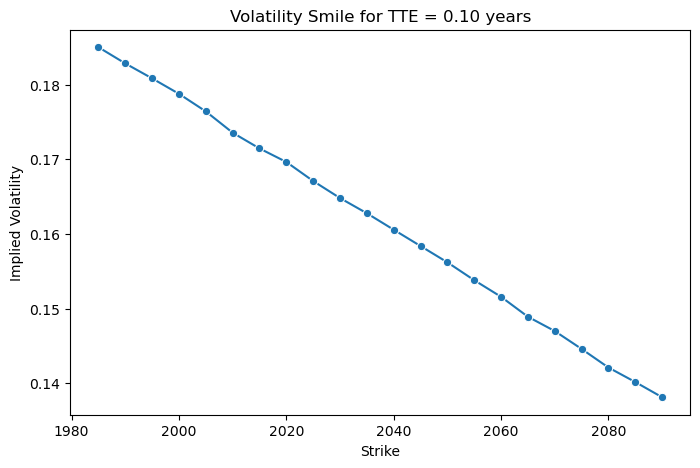

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select an expiration date
alternative_maturity = df_param["time_to_expiry"].unique()[1]  # Change index to pick another maturity
df_alt_maturity = df_param[df_param["time_to_expiry"] == alternative_maturity]

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_alt_maturity, x="strike", y="impl_vol", marker="o")
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.title(f"Volatility Smile for TTE = {alternative_maturity:.2f} years")
plt.show()


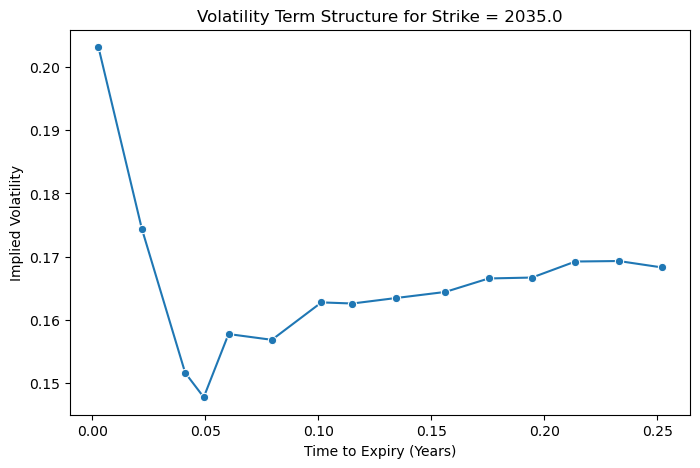

In [135]:
# Select a fixed strike (e.g., median strike)
atm_strike = df_param["strike"].median()
df_fixed_strike = df_param[df_param["strike"] == atm_strike]

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_fixed_strike, x="time_to_expiry", y="impl_vol", marker="o")
plt.xlabel("Time to Expiry (Years)")
plt.ylabel("Implied Volatility")
plt.title(f"Volatility Term Structure for Strike = {atm_strike}")
plt.show()


#### Calibrate Heston model based on the above example

In [190]:
# Print header of data frame
df_param.head()

,spot,time_to_expiry,strike,call,impl_vol,rate
7822685,2046.0,0.021918,2020.0,33.9,0.186144,0.01
7822686,2046.0,0.021918,2025.0,30.2,0.182448,0.01
7822687,2046.0,0.021918,2030.0,26.8,0.178269,0.01
7822688,2046.0,0.021918,2035.0,23.6,0.174420,0.01
7822689,2046.0,0.021918,2040.0,21.2,0.174757,0.01


### Part 1 - implement the characteristic function

In [150]:
pip install nelson-siegel-svensson

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [395]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.optimize import minimize
from datetime import datetime as dt

from nelson_siegel_svensson import NelsonSiegelSvenssonCurve
from nelson_siegel_svensson.calibrate import calibrate_nss_ols

In [515]:
import numpy as np
import numba

@numba.njit
def heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    a = kappa * theta
    b = kappa + lambd
    rspi = rho * sigma * phi * 1j
    d = np.sqrt((rho * sigma * phi * 1j - b) ** 2 + (phi * 1j + phi ** 2) * sigma ** 2)
    g = (b - rspi + d) / (b - rspi - d)
    exp1 = np.exp(r * phi * 1j * tau)
    term2 = S0 ** (phi * 1j) * ((1 - g * np.exp(d * tau)) / (1 - g)) ** (-2 * a / sigma ** 2)
    exp2 = np.exp(a * tau * (b - rspi + d) / sigma ** 2 +
                  v0 * (b - rspi + d) * ((1 - np.exp(d * tau)) / (1 - g * np.exp(d * tau))) / sigma ** 2)
    return exp1 * term2 * exp2


### Part 2 - define the integrand as a function

In [520]:
@numba.njit
def integrand(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r, K):
    term1 = np.exp(r * tau) * heston_charfunc(phi - 1j, S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    term2 = K * heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    numerator = term1 - term2
    denominator = 1j * phi * K**(1j * phi)
    return numerator / denominator


### Part 3 - perform numerical integration over integrand and calculate option price

#### Using scipy integrate quad function

In [623]:
from scipy.integrate import quad_vec

def heston_price_vec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r, K)
    # quad_vec returns the integral evaluated in a vectorized manner.
    real_integral, err = quad_vec(lambda phi: np.real(integrand(phi, *args)), 0, 80)
    return (S0 - K*np.exp(-r*tau))/2 + real_integral/np.pi


### Parameters to test the model

In [699]:
# Parameters to test model

S0 = 110. # initial asset price
K = 100. # strike
v0 = 0.01 # initial variance
r = 0.02 # risk free rate
kappa = 1.3482 # rate of mean reversion of variance process
theta = 0.043 # long-term mean variance
sigma = 0.2 # volatility of volatility
lambd = 0.575 # risk premium of variance
rho = -0.5711 # correlation between variance and stock process
tau = 1. # time to maturity



In [701]:
heston_price_vec( S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r )

14.967075747994164

### Calibrating the model

In [633]:
import numpy as np
from scipy.optimize import minimize

# Sample 50 data points from your market data DataFrame (df_param)
df_sample = df_param.sample(n=10, random_state=42)

# Extract arrays from the sample (ensure these match our function inputs)
S0 = df_sample['spot'].to_numpy(dtype=float)
r = df_sample['rate'].to_numpy(dtype=float)
K = df_sample['strike'].to_numpy(dtype=float)
tau = df_sample['time_to_expiry'].to_numpy(dtype=float)
market_prices = df_sample['call'].to_numpy(dtype=float)

# Define initial parameter guesses and bounds for calibration.
# We calibrate six parameters: v0, kappa, theta, sigma, rho, lambd.
params = {
    "v0":    {"x0": 0.1,  "lbub": [1e-3, 0.1]},
    "kappa": {"x0": 3.0,  "lbub": [1e-3, 5.0]},
    "theta": {"x0": 0.05, "lbub": [1e-3, 0.1]},
    "sigma": {"x0": 0.3,  "lbub": [1e-2, 1.0]},
    "rho":   {"x0": -0.8, "lbub": [-1.0, 0.0]},
    "lambd": {"x0": 0.03, "lbub": [-1.0, 1.0]},
}

# Create initial guess vector and bounds list.
x0 = [params[key]["x0"] for key in ["v0", "kappa", "theta", "sigma", "rho", "lambd"]]
bounds = [params[key]["lbub"] for key in ["v0", "kappa", "theta", "sigma", "rho", "lambd"]]

# Define the squared error function to be minimized.
def SqErr(x):
    # Unpack the parameters
    v0, kappa, theta, sigma, rho, lambd = x
    
    # Compute model prices using the vectorized Heston pricing function.
    # Here, heston_price_vec is assumed to be our vectorized pricing function
    # that integrates the integrand (which in turn calls the Numba-compiled functions).
    model_prices = heston_price_vec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r)
    
    # Calculate the mean squared error between market and model prices.
    error = np.sum((market_prices - model_prices) ** 2) / len(market_prices)
    return error




In [635]:
# Perform the optimization using SLSQP.
result = minimize(SqErr, x0, method='SLSQP', bounds=bounds, tol=1e-3,
                  options={'maxiter': int(1e4)})

# Output the calibrated parameters.
print("Calibrated parameters (v0, kappa, theta, sigma, rho, lambd):", result.x)

Calibrated parameters (v0, kappa, theta, sigma, rho, lambd): [ 0.02025808  3.83523133  0.02977231  0.33389063 -0.96698928  0.97022592]


### Calculate estimated option prices using calibrated parameters

Using heston model with estimated parameters

In [637]:
# Unpack calibrated parameters from your optimizer result:
v0_cal, kappa_cal, theta_cal, sigma_cal, rho_cal, lambd_cal = result.x

# Extract arrays for each variable from df_param
S0_all   = df_param['spot'].to_numpy(dtype=float)
K_all    = df_param['strike'].to_numpy(dtype=float)
tau_all  = df_param['time_to_expiry'].to_numpy(dtype=float)
r_all    = df_param['rate'].to_numpy(dtype=float)

# Compute the model prices using the vectorized pricing function.
# This function should use our Numba-compiled characteristic and integrand functions.
model_prices = heston_price_vec(S0_all, K_all, v0_cal, kappa_cal, theta_cal,
                                sigma_cal, rho_cal, lambd_cal, tau_all, r_all)

# Add the computed model prices to the DataFrame for comparison
df_param['model_price'] = model_prices


In [638]:
df_param

,spot,time_to_expiry,strike,call,impl_vol,rate,model_price
7822685,2046.0,0.021918,2020.0,33.9,0.186144,0.01,33.769881
7822686,2046.0,0.021918,2025.0,30.2,0.182448,0.01,29.807713
7822687,2046.0,0.021918,2030.0,26.8,0.178269,0.01,26.064833
7822688,2046.0,0.021918,2035.0,23.6,0.174420,0.01,22.563489
7822689,2046.0,0.021918,2040.0,21.2,0.174757,0.01,19.322470
...,...,...,...,...,...,...,...
7830726,2046.0,0.884932,2075.0,105.4,0.172057,0.01,104.093068
7830727,2046.0,0.884932,2100.0,92.2,0.167319,0.01,91.022390
7830728,2046.0,0.884932,2125.0,79.9,0.162709,0.01,78.896233
7830729,2046.0,0.884932,2150.0,68.5,0.158109,0.01,67.722688


In [642]:
# Calculate maximum difference between model price and market price

max_diff = (df_param['model_price'] - df_param['call']).abs().max()
print("Maximum difference:", max_diff)

Maximum difference: 18.646201161556974


In [691]:
pip install financepy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [693]:
from financepy.products.options import FinOptionEuropean
from financepy.models.heston import Heston
from datetime import datetime

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



ModuleNotFoundError: No module named 'financepy.products.options'

### Heston pricing using faster approach (following paper)

#### Step 1: Implement the Heston Characteristic Function

In [792]:
import numpy as np
import numba

@numba.njit
def heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    a = kappa * theta
    b = kappa + lambd
    rspi = rho * sigma * phi * 1j
    d = np.sqrt((rho * sigma * phi * 1j - b) ** 2 + (phi * 1j + phi ** 2) * sigma ** 2)
    g = (b - rspi + d) / (b - rspi - d)
    exp1 = np.exp(r * phi * 1j * tau)
    term2 = S0 ** (phi * 1j) * ((1 - g * np.exp(d * tau)) / (1 - g)) ** (-2 * a / sigma ** 2)
    exp2 = np.exp(a * tau * (b - rspi + d) / sigma ** 2 +
                  v0 * (b - rspi + d) * ((1 - np.exp(d * tau)) / (1 - g * np.exp(d * tau))) / sigma ** 2)
    return exp1 * term2 * exp2

#### Step 2: Implement the Integrand function

In [795]:
@numba.njit
def integrand(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r, K, epsilon=1e-8):
    """ Computes the integrand for Heston model integration, avoiding division by zero. """
    
    # Prevent division by zero by replacing small phi values with epsilon
    phi = np.where(np.abs(phi) < epsilon, epsilon, phi)

    term1 = np.exp(r * tau) * heston_charfunc(phi - 1j, S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    term2 = K * heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    numerator = term1 - term2
    denominator = 1j * phi * K**(1j * phi)
    
    return numerator / denominator


#### Step 3: Implement the Heston pricing function, integrating with Gauss-Legendre

In [798]:
from scipy.special import roots_legendre

def gauss_legendre_integration(func, a, b, n=32):
    """Performs Gauss-Legendre quadrature for integration."""
    x, w = roots_legendre(n)  # Get nodes and weights
    t = 0.5 * (b - a) * x + 0.5 * (b + a)  # Transform nodes to interval [a, b]
    return np.sum(w * func(t)) * 0.5 * (b - a)

def heston_price_vec(S0, K_arr, v0, kappa, theta, sigma, rho, lambd, tau_arr, r):
    """Computes Heston option prices using Gauss-Legendre quadrature instead of quad_vec."""

    def integrand_wrapper(phi, K, tau):
        return np.real(integrand(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r, K))

    # Compute prices for each strike-expiry pair separately
    option_prices = np.array([
        (S0 - K_arr[i] * np.exp(-r * tau_arr[i])) / 2 + 
        gauss_legendre_integration(lambda phi: integrand_wrapper(phi, K_arr[i], tau_arr[i]), 0, 80, n=32) / np.pi
        for i in range(len(K_arr))
    ])
    
    return option_prices


#### Step 4: Test the pricing function

In [823]:
S0 = 110.0  # Initial asset price
K = 100.0   # Strike price
v0 = 0.01   # Initial variance
r = 0.02    # Risk-free rate
kappa = 1.3482  # Mean reversion speed of variance process
theta = 0.043   # Long-term mean variance
sigma = 0.2     # Volatility of variance
lambd = 0.575   # Risk premium of variance
rho = -0.5711   # Correlation between variance and stock process
tau = 1.0       # Time to maturity

# Convert scalars to arrays for function input compatibility
K_arr = np.array([K])
tau_arr = np.array([tau])

# Compute the Heston model price
price = heston_price_vec(S0, K_arr, v0, kappa, theta, sigma, rho, lambd, tau_arr, r)

# Print the computed option price
print("Heston Model Option Price:", price[0])

Heston Model Option Price: 14.967075747994217


#### Step 5: Calibrate the model

In [811]:
import numpy as np
from scipy.optimize import minimize

# Sample 10 data points from your market data DataFrame (df_param)
df_sample = df_param.sample(n=500, random_state=42)

# Extract correct data types
S0 = df_sample['spot'].iloc[0]  # Ensure S0 is a scalar
r = df_sample['rate'].iloc[0]   # Ensure r is a scalar
K_arr = df_sample['strike'].to_numpy(dtype=float)  # K should be an array
tau_arr = df_sample['time_to_expiry'].to_numpy(dtype=float)  # Tau should be an array
market_prices = df_sample['call'].to_numpy(dtype=float)  # Market prices as array

# Define initial parameter guesses and bounds for calibration.
params = {
    "v0":    {"x0": 0.1,  "lbub": [1e-3, 0.1]},
    "kappa": {"x0": 3.0,  "lbub": [1e-3, 5.0]},
    "theta": {"x0": 0.05, "lbub": [1e-3, 0.1]},
    "sigma": {"x0": 0.3,  "lbub": [1e-2, 1.0]},
    "rho":   {"x0": -0.8, "lbub": [-1.0, 0.0]},
    "lambd": {"x0": 0.03, "lbub": [-1.0, 1.0]},
}

# Create initial guess vector and bounds list.
x0 = [params[key]["x0"] for key in ["v0", "kappa", "theta", "sigma", "rho", "lambd"]]
bounds = [params[key]["lbub"] for key in ["v0", "kappa", "theta", "sigma", "rho", "lambd"]]

# Define the squared error function to be minimized.
def SqErr(x):
    # Unpack the parameters
    v0, kappa, theta, sigma, rho, lambd = x
    
    # Compute model prices using the vectorized Heston pricing function.
    model_prices = heston_price_vec(S0, K_arr, v0, kappa, theta, sigma, rho, lambd, tau_arr, r)
    
    # Calculate the mean squared error between market and model prices.
    error = np.sum((market_prices - model_prices) ** 2) / len(market_prices)
    return error




In [813]:
# Run calibration
result = minimize(SqErr, x0, method='SLSQP', bounds=bounds, tol=1e-3, options={'maxiter': 10000})

print("Calibrated Parameters:", result.x)

Calibrated Parameters: [ 0.02203546  3.43127089  0.02190739  0.20348282 -0.57214761  0.5760735 ]


### Step 6: Calculate the heston prices with calibrated parameters

In [817]:
# Extract the full dataset
S0_full = df_param['spot'].iloc[0]  # Single spot price
r_full = df_param['rate'].iloc[0]   # Single risk-free rate
K_full = df_param['strike'].to_numpy(dtype=float)  # Strike array
tau_full = df_param['time_to_expiry'].to_numpy(dtype=float)  # Expiry array
market_prices_full = df_param['call'].to_numpy(dtype=float)  # Market prices

# Compute Heston prices using the full dataset
heston_prices_full = heston_price_vec(S0_full, K_full, *result.x, tau_full, r_full)

# Create a DataFrame to compare values
comparison_df = pd.DataFrame({
    "Strike": K_full,
    "Time to Expiry": tau_full,
    "Market Price": market_prices_full,
    "Heston Price": heston_prices_full,
    "Difference": market_prices_full - heston_prices_full
})

# Display the comparison
print(comparison_df)


     Strike  Time to Expiry  Market Price  Heston Price  Difference
0    2020.0        0.021918          33.9     33.722774    0.177226
1    2025.0        0.021918          30.2     29.927629    0.272371
2    2030.0        0.021918          26.8     26.359752    0.440248
3    2035.0        0.021918          23.6     23.036028    0.563972
4    2040.0        0.021918          21.2     19.969776    1.230224
..      ...             ...           ...           ...         ...
522  2075.0        0.884932         105.4    101.990139    3.409861
523  2100.0        0.884932          92.2     89.635918    2.564082
524  2125.0        0.884932          79.9     78.213971    1.686029
525  2150.0        0.884932          68.5     67.718999    0.781001
526  2175.0        0.884932          58.0     58.137445   -0.137445

[527 rows x 5 columns]
